In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-price-dataset-from-sept-2014-to-oct-2021/BTC-USD.csv


In [2]:
import pandas as pd
import numpy as np
bitdf=pd.read_csv('../input/bitcoin-price-dataset-from-sept-2014-to-oct-2021/BTC-USD.csv')
bitdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [3]:
bitdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2587 non-null   object 
 1   Open       2583 non-null   float64
 2   High       2583 non-null   float64
 3   Low        2583 non-null   float64
 4   Close      2583 non-null   float64
 5   Adj Close  2583 non-null   float64
 6   Volume     2583 non-null   float64
dtypes: float64(6), object(1)
memory usage: 141.6+ KB


In [4]:
bitdf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2.583000e+03
mean,9400.048053,9668.502386,9114.186078,9422.977756,9422.977756,1.373455e+10
std,13775.684391,14194.890140,13319.523448,13812.089925,13812.089925,1.989676e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,577.671997,582.812988,573.377502,577.486481,577.486481,7.401720e+07
50%,5466.524414,5633.802246,5295.877930,5505.283691,5505.283691,4.553270e+09
75%,9693.365235,9896.820312,9492.367188,9695.651367,9695.651367,2.218633e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [5]:
bitdf.shape

(2587, 7)

In [6]:
#convert the date column datatype to datetime
bitdf['Date']=pd.to_datetime(bitdf['Date'])

In [7]:
#making date column as index
bitdf=bitdf.set_index(bitdf['Date'])

In [8]:
bitdf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [9]:
#drop the old Date column
bitdf.drop(['Date'],axis=1,inplace=True)

In [10]:
bitdf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [11]:
#Checking rows with missing values
bitdf[bitdf.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#drop the rows with missing values
bitdf.dropna(inplace=True)

In [13]:
bitdf.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize']=20,5

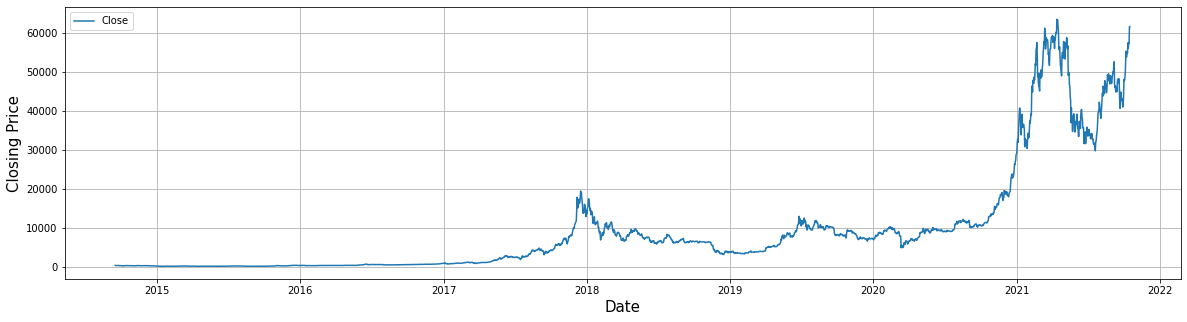

In [15]:
plt.grid(True)
plt.xlabel('Date',size=15)
plt.ylabel('Closing Price',size=15)
plt.plot(bitdf['Close'],label='Close')
plt.legend(loc='best')
plt.show()

In [16]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:title={'center':'Closing Price Scatter Plot'}, xlabel='Date', ylabel='Closing Price'>

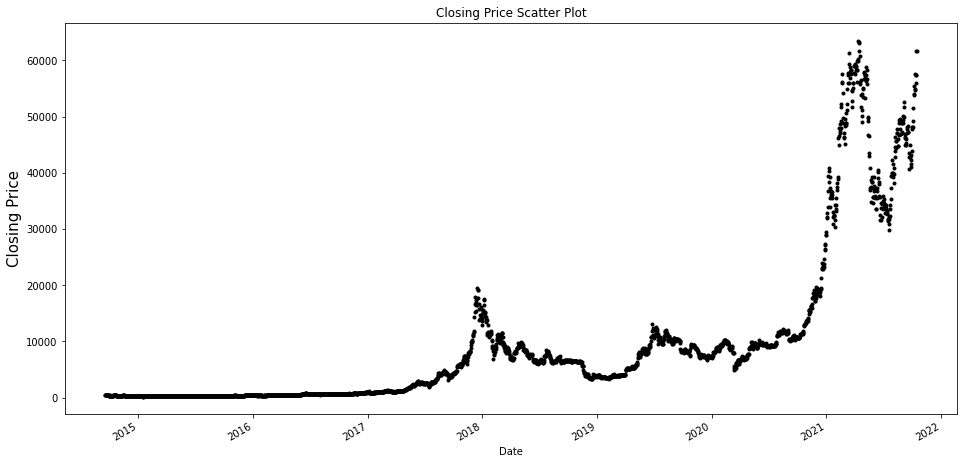

In [17]:
plt.figure(figsize=(16,8))
plt.title('Closing Price Scatter Plot')
plt.ylabel('Closing Price',size=15)
plt.grid(True)
df_close=bitdf['Close']
df_close.plot(style='k.')

# Simple Moving Average

In [18]:
#rolling average transformation with window 20
rollingseries=bitdf.rolling(window=100)
rollingmean=rollingseries.mean()
rollingstd=rollingseries.std()
rollingmean['Close'].head(30)
rollingstd['Close'].head(30)

Date
2014-09-17   NaN
2014-09-18   NaN
2014-09-19   NaN
2014-09-20   NaN
2014-09-21   NaN
2014-09-22   NaN
2014-09-23   NaN
2014-09-24   NaN
2014-09-25   NaN
2014-09-26   NaN
2014-09-27   NaN
2014-09-28   NaN
2014-09-29   NaN
2014-09-30   NaN
2014-10-01   NaN
2014-10-02   NaN
2014-10-03   NaN
2014-10-04   NaN
2014-10-05   NaN
2014-10-06   NaN
2014-10-07   NaN
2014-10-08   NaN
2014-10-09   NaN
2014-10-10   NaN
2014-10-11   NaN
2014-10-12   NaN
2014-10-13   NaN
2014-10-14   NaN
2014-10-15   NaN
2014-10-16   NaN
Name: Close, dtype: float64

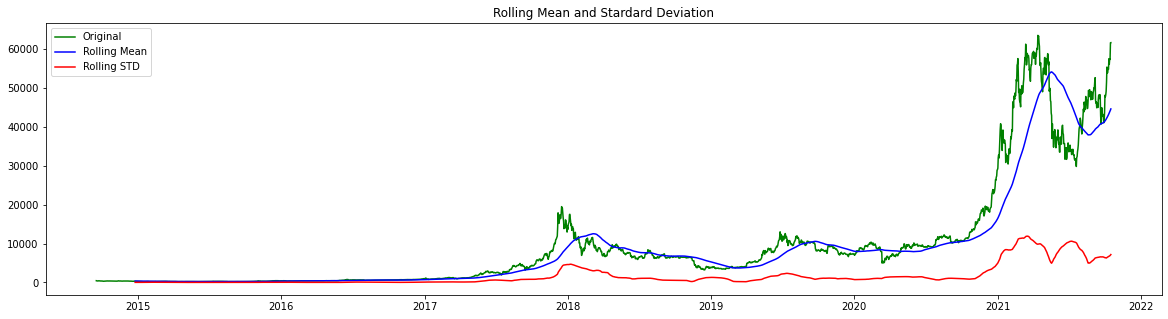

In [19]:
plt.plot(bitdf['Close'],color='green',label='Original')
plt.plot(rollingmean['Close'],color='blue',label='Rolling Mean')
plt.plot(rollingstd['Close'],color='red',label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean and Stardard Deviation')
plt.show(block=False)

**Inference : Rolling mean is not constant over time, but std is more or less constant over time.Hence, the time series is not stationary**

# Simple Exponential Smoothing

In [20]:
data=bitdf['Close'][:50]

#less value of α i.e 0.2, which is giving less weight to most recent observation
fit1=SimpleExpSmoothing(data).fit(smoothing_level=0.2)
# more value of α i.e 0.8, which signifies more weight to most recent observation
fit2=SimpleExpSmoothing(data).fit(smoothing_level=0.8)

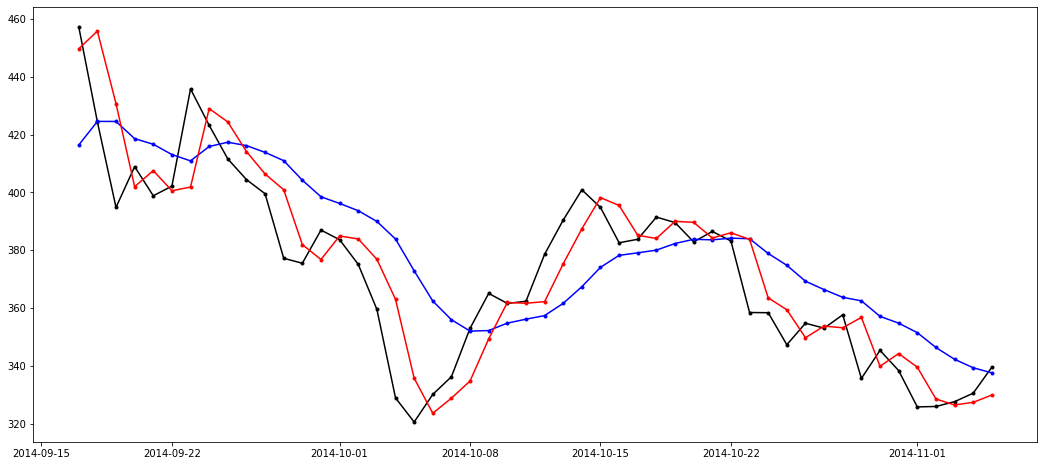

In [21]:
plt.figure(figsize=(18,8))
#Black line is the original trend based on observation
plt.plot(bitdf['Close'][:50],marker='.',color='black')

#Blue line is less value to most recent observation, and more value to the overall observation
plt.plot(fit1.fittedvalues,marker='.',color='blue')

#Red line is more value to the most recent observation
plt.plot(fit2.fittedvalues,marker='.',color='red')

# Holt method for exponential smoothing

In [22]:
fit1=Holt(data).fit()#We assume that the data has a linear trend

fit2=Holt(data,exponential=True).fit() #We assume that the data has exponential trend

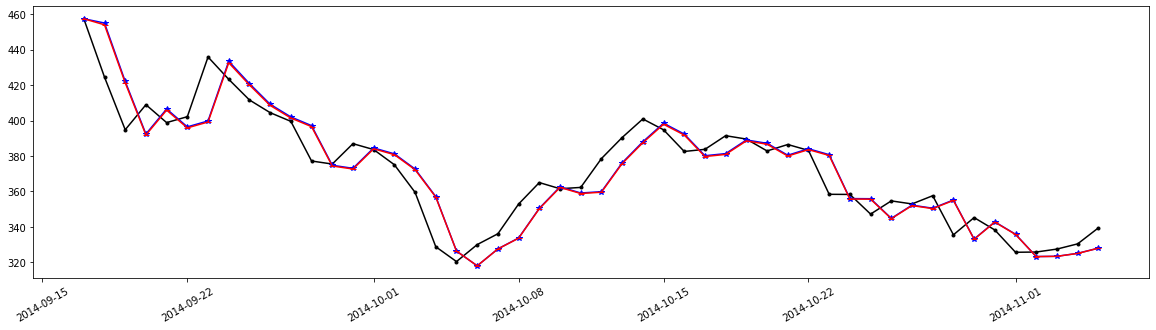

In [23]:
plt.plot(data,marker='.',color='black')
plt.xticks(rotation=30)
plt.plot(fit1.fittedvalues,marker='*',color='blue')
plt.plot(fit2.fittedvalues,marker='_',color='red')

Exponential plot(red) is exactly on the Linear Plot(Blue), hence we can say that the data has a linear trend, not exponential trend.

# Decomposition and Stationarity Check

**What is Time Series Decomposition**


Time series decomposition is a process of deconstructing a time series into the following components:

* Trend — general movement over time. 
* Seasonal — behaviors captured in individual seasonal periods. 
* Residual — everything not captured by trend and seasonal components.

So, it is basically finding the Additive and Multiplicative parts of a Time Series

**Additive Time Series** : Value=Base Level+Trend+Seasonality+Error

**Multiplicative Time Series** : Value=Base Level x Trend X Seasonality x Error

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

In [25]:
bitdf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [26]:
#Multiplicative Decomposition
mul_result=seasonal_decompose(bitdf['Close'],model='multiplicative',period=1)
#Additive Decomposition
add_result=seasonal_decompose(bitdf['Close'],model='additive',period=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

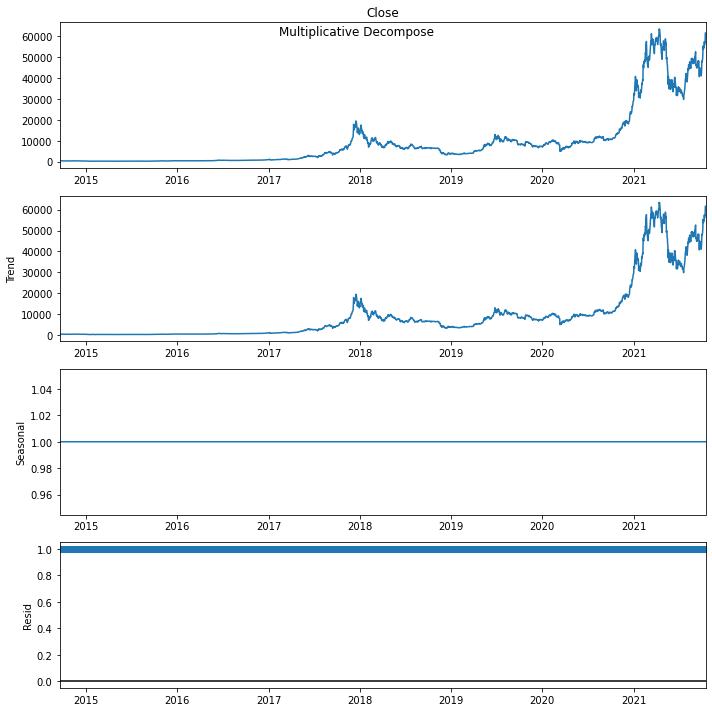

In [27]:
#plot Multiplicative decompose
plt.rcParams.update({'figure.figsize':(10,10)})
mul_result.plot().suptitle("\nMultiplicative Decompose",fontsize=12)

1st figure is original time series, 2nd figure is depicting the trend component, 3rd figure is showing the seasonality component which is not much and 4th figure is residue which is also non significant.

Text(0.5, 0.98, '\nAdditive Decompose')

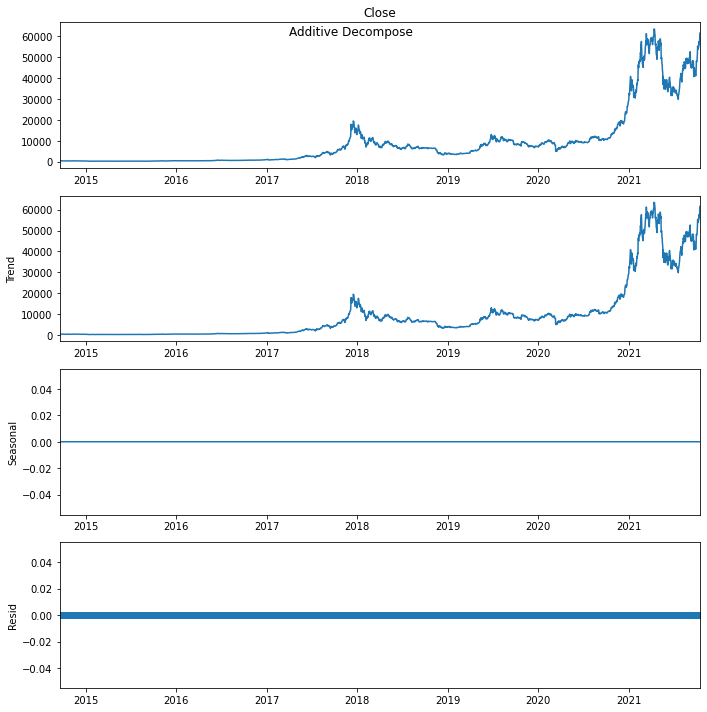

In [28]:
#plot Additive Decompose
plt.rcParams.update({'figure.figsize':(10,10)})
add_result.plot().suptitle("\nAdditive Decompose",fontsize=12)

In [29]:
#Additive
new_df_add=pd.concat([add_result.seasonal,add_result.trend,add_result.resid,add_result.observed],axis=1)
new_df_add.columns=['seasonality','trend','residual','actual_values']
new_df_add.head(5)

,seasonality,trend,residual,actual_values
Date,,,,
2014-09-17,0.0,457.334015,0.0,457.334015
2014-09-18,0.0,424.440002,0.0,424.440002
2014-09-19,0.0,394.795990,0.0,394.795990
2014-09-20,0.0,408.903992,0.0,408.903992
2014-09-21,0.0,398.821014,0.0,398.821014


In [30]:
#Multiplicative
new_df_mul=pd.concat([mul_result.seasonal,mul_result.trend,mul_result.resid,mul_result.observed],axis=1)
new_df_mul.columns=['seasonality','trend','residual','actual_values']
new_df_mul.head(5)

,seasonality,trend,residual,actual_values
Date,,,,
2014-09-17,1.0,457.334015,1.0,457.334015
2014-09-18,1.0,424.440002,1.0,424.440002
2014-09-19,1.0,394.795990,1.0,394.795990
2014-09-20,1.0,408.903992,1.0,408.903992
2014-09-21,1.0,398.821014,1.0,398.821014


# ADFULLER TEST FOR STATIONARITY

**Defination of Stationarity - Constant Mean and Variance**

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
#ADF Test - nul hypothesis - non-stationary - if p-value <5% reject null hypothesis
adfuller_result=adfuller(bitdf.Close.values,autolag='AIC')
# adfuller_result

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'P-value: {adfuller_result[1]}')

for key,value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'  {key}, {value}')

ADF Statistic: 0.7284755299703922
P-value: 0.9903893475706665
Critical Values:
  1%, -3.4329129931922178
Critical Values:
  5%, -2.862672327302294
Critical Values:
  10%, -2.5673727798916928


**We can see the P-Value is not <5%, hence we can say that the time series is non-stationary. 
Due to which we cannot use this time series data for machine learning, without making it stationary.**

# Auto regression using ACF and PACF

In [33]:
import matplotlib
matplotlib.rc('xtick',labelsize=30)
matplotlib.rc('ytick',labelsize=30)

import seaborn as sns
sns.set(style='whitegrid',color_codes=True)
from statsmodels.tsa.stattools import acf,pacf

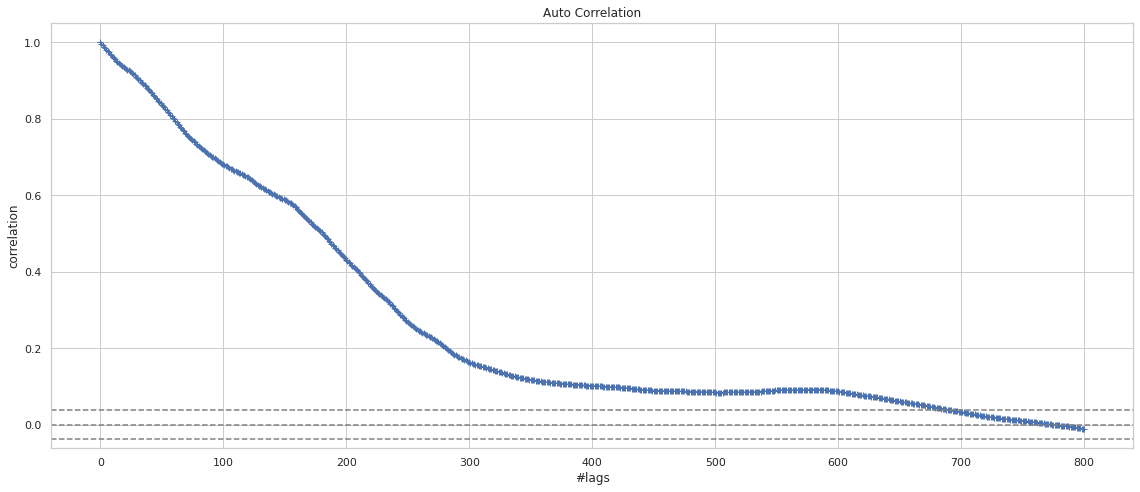

In [34]:
#Calling AutoCorrelationFunction with a lag of 200
y=bitdf['Close']
ACF_lag=acf(bitdf['Close'],nlags=800)


plt.figure(figsize=(16,7))
plt.plot(ACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Auto Correlation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()

**From the above graph we can see that there is a descent amount of correlation till 600-650 lags.That means the time series is related to previous 650 observations or this time series can be regressed on previous 650 observations.But, if we consider the previous 650 observations, there will be multicolinearaity problem. Because,at time T, if the time series can be explained by T-1, at time T-1 also, the time series can be explained by T-2.**

**So,we dont want to have a very large no. of lags to be considered, we want to limit this lags, to avoid multicolinearity.**

**That can be addressed by PACF Chart.**

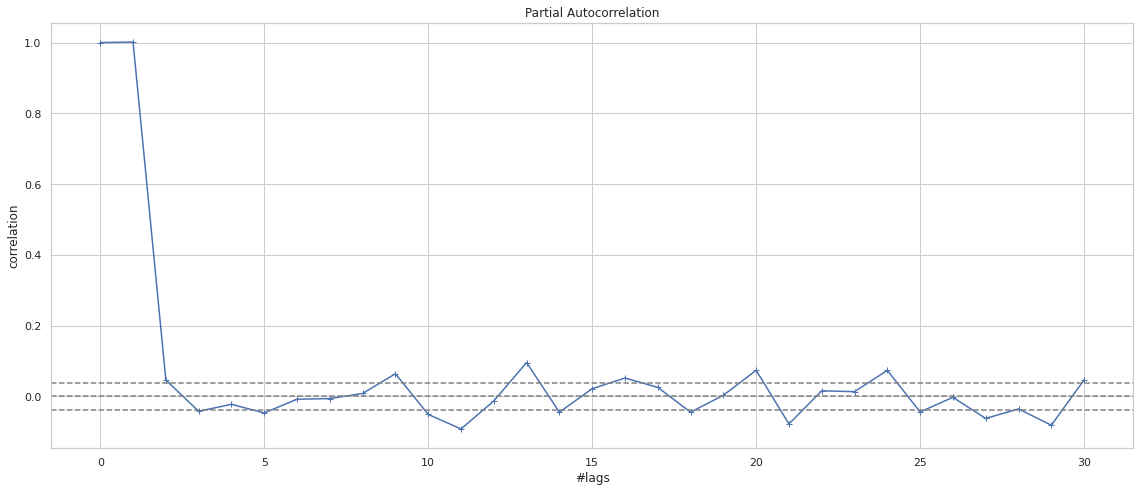

In [35]:
PACF_lag=pacf(y,nlags=30,method='ols')

plt.figure(figsize=(16,7))
plt.plot(PACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()


**PACF chart shows the actual lags which impacts the time series after removing the noise.**

**So, from the chart we can see there is a significant amount of correlation upto value 2-2.3, hence our auto regression model should be of window 2.3, i.e. take the lag of the time series upto 2.3 lags and use the time series to predict the next value.**

# Making the series Stationary

Text(0.5, 1.0, 'Log Transformation of the Time Series')

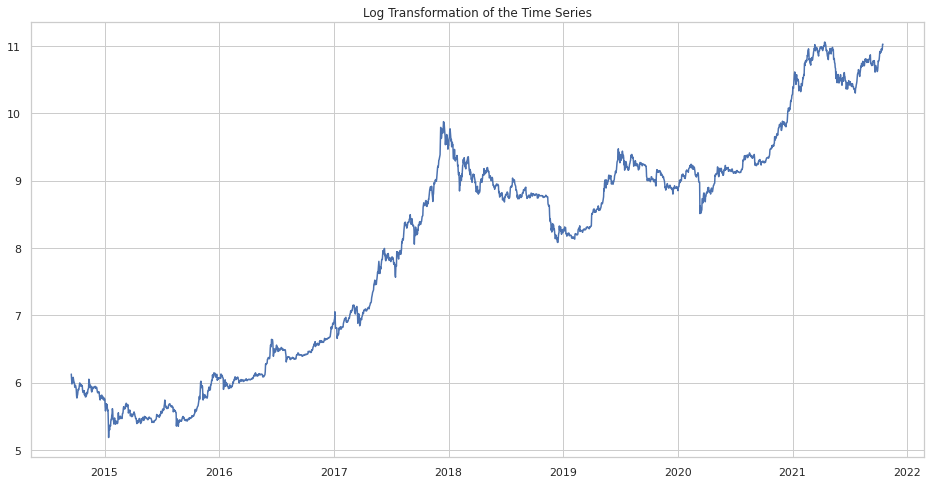

In [36]:
#Transforming the time series into its log transformation
import numpy as np
plt.figure(figsize=(16,8))
ts_log=np.log(df_close)
plt.plot(ts_log)
plt.title('Log Transformation of the Time Series')


**Even after log transformation, we can see that the time series is not stationary**

# Lets decompose the log time series to double check whether the time series is stationary

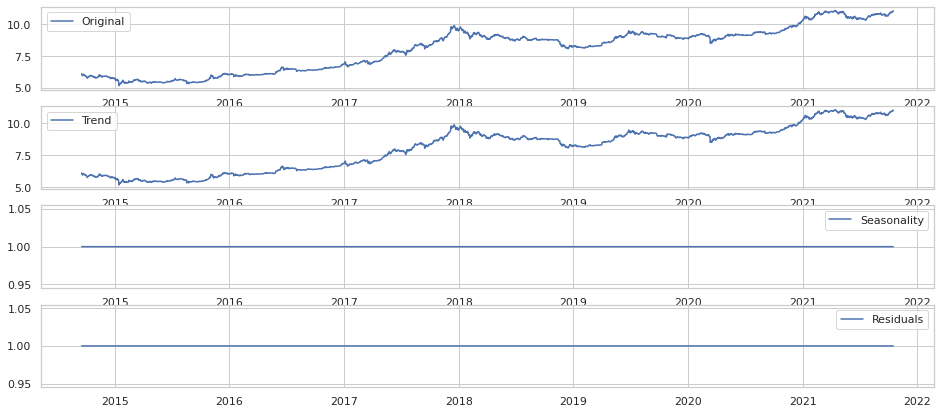

In [37]:
#Decomposition of the log Time Series

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ts_log,freq=1,model='multiplicative')

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(16,7))
fig=plt.figure(1)

plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')

**from the above chart it is very evident that trend component is contributing more to the original time series**

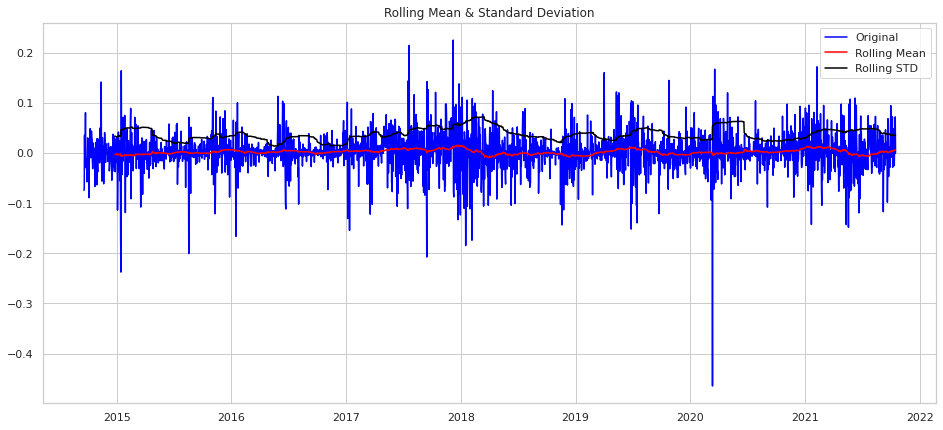

In [38]:
#Differenced Timeseries from log Time Series
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ts_log_diff=ts_log.diff()

#Determining rolling statistic
rollmean=ts_log_diff.rolling(100).mean()
rollstd=ts_log_diff.rolling(100).std()

#Plot rolling statistic
orig=plt.plot(ts_log_diff,color='blue',label='Original')
mean=plt.plot(rollmean,color='red',label='Rolling Mean')
std=plt.plot(rollstd,color='black',label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

**From the graph above, we can see neither the a upward trend in rolling mean nor a upward trend in rolling STD. So, we can assume that this time series is Stationary.**

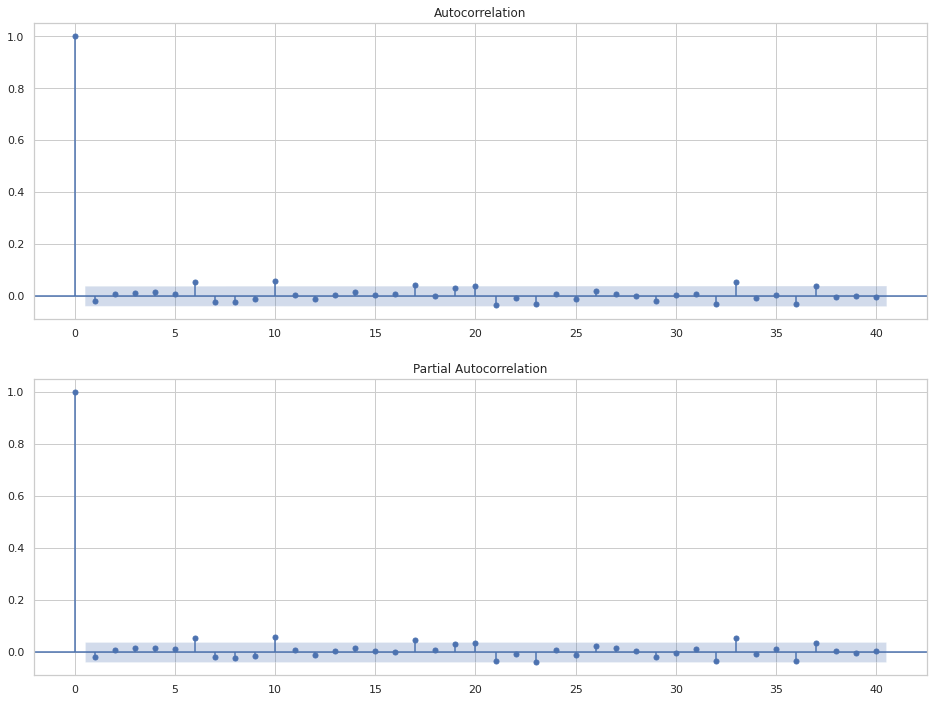

In [39]:
#plot the AutoCorrelation and Partial AutoCorrelation chart
import statsmodels.api as sm
fig=plt.figure(figsize=(16,12))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)


**from the above graph, we can see the 7th (Index No 6 starting from 0) data point is just crossing the confidence interval, in both the correlation, hence we can try 6 as order of AR and order of MA, to start with.Though, we are not sure whether that is the best order. Let us start with p=6, d=1 and q=6 to start with.**

In [40]:
from statsmodels.tsa.arima_model import ARIMA

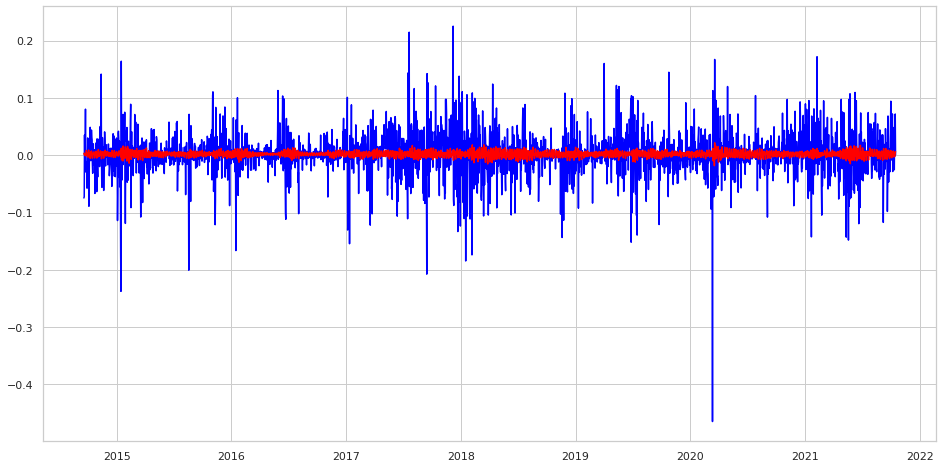

In [41]:
plt.figure(figsize=(16,8))
model=ARIMA(ts_log,order=(6,1,6))
results_ARIMA=model.fit(disp=-1)
plt.plot(ts_log_diff,color='blue')
plt.plot(results_ARIMA.fittedvalues,color='red')

**The Blue line above is the actual ts_log_diff time series and the red line is the predicted time series by ARIMA model.**

In [42]:
results_ARIMA.fittedvalues

Date
2014-09-18    0.001898
2014-09-19    0.003568
2014-09-20    0.003238
2014-09-21   -0.000375
2014-09-22    0.000590
                ...   
2021-10-12    0.005053
2021-10-13   -0.002287
2021-10-14    0.001893
2021-10-15    0.004361
2021-10-16    0.006265
Length: 2582, dtype: float64

# Taking the results back to its original scale

In [43]:
#Storing the fitted values in a series
ARIMA_diff_predictions=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(ARIMA_diff_predictions.head())

Date
2014-09-18    0.001898
2014-09-19    0.003568
2014-09-20    0.003238
2014-09-21   -0.000375
2014-09-22    0.000590
dtype: float64


In [44]:
#taking the cumulative sum, because we took the differenced time series
ARIMA_diff_predictions_cumsum=ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum)

Date
2014-09-18    0.001898
2014-09-19    0.005467
2014-09-20    0.008705
2014-09-21    0.008330
2014-09-22    0.008919
                ...   
2021-10-12    4.896456
2021-10-13    4.894170
2021-10-14    4.896063
2021-10-15    4.900424
2021-10-16    4.906689
Length: 2582, dtype: float64


In [45]:
#Adding the log prediction values to compensate the differencing
ARIMA_log_prediction=pd.Series(ts_log.iloc[0],index=df_close.index)
ARIMA_log_prediction=ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2014-09-17    6.125414
2014-09-18    6.127312
2014-09-19    6.130881
2014-09-20    6.134119
2014-09-21    6.133744
dtype: float64

Text(0.5, 1.0, 'RMSE: 7473.19')

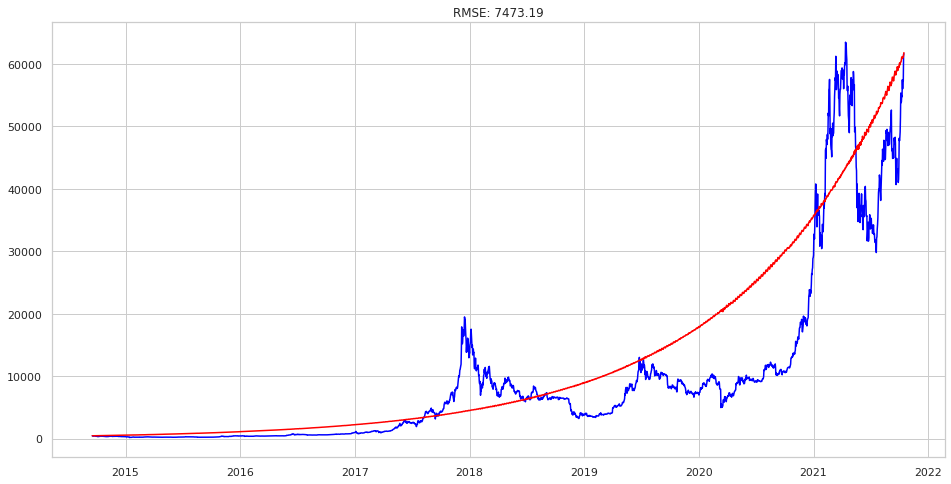

In [46]:
plt.figure(figsize=(16,8))
predictions_ARIMA=np.exp(ARIMA_log_prediction)
plt.plot(df_close,color='blue')
plt.plot(predictions_ARIMA,color='red')
plt.title('RMSE: %.2f'% np.sqrt(sum((predictions_ARIMA-df_close)**2)/len(df_close)))

**So, ARIMA model predicts the trend component quite well, but it is unable to predict the inbetween variations.**
 
**Requests suggestions to improve this model.**